## **Import Libraries**

In [1]:
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [3]:
train_df = pd.read_csv('C:\\Users\\singh.lakhbir\\Downloads\\train.csv')
train_df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test_df = pd.read_csv('C:\\Users\\singh.lakhbir\\Downloads\\test.csv')
test_df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## **Data preprocessing**

In [5]:
## Let's get some information about the dataset.

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

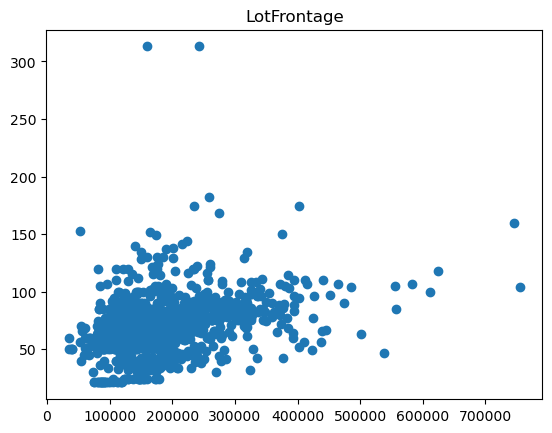

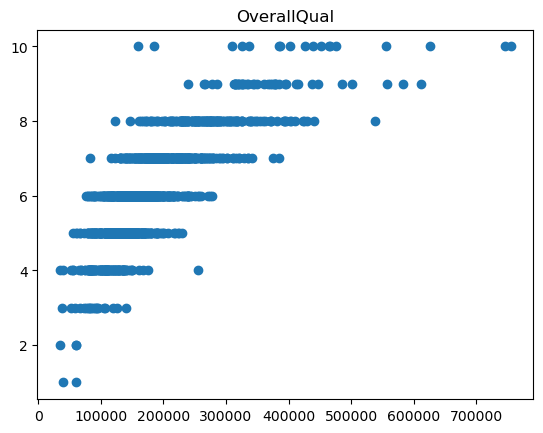

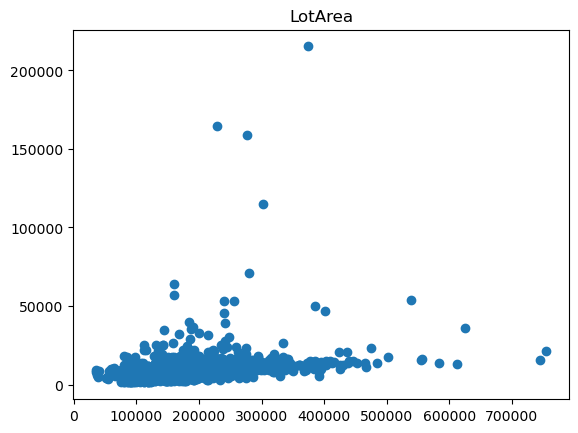

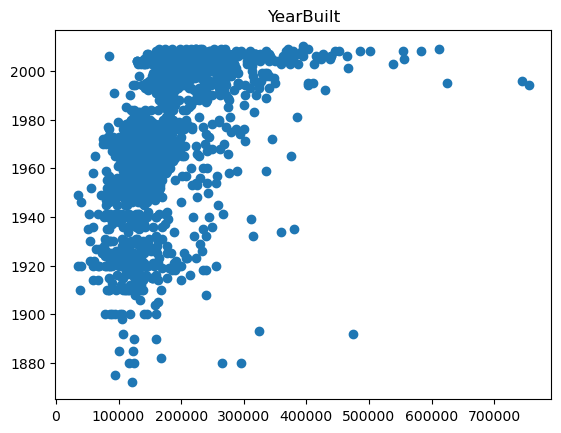

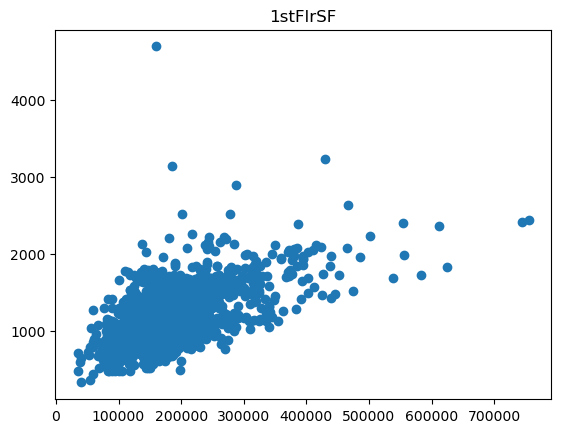

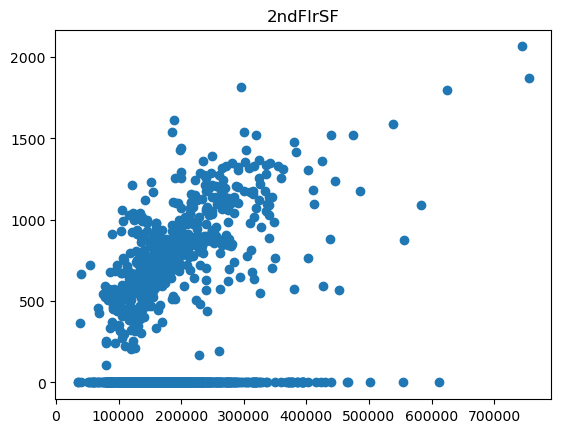

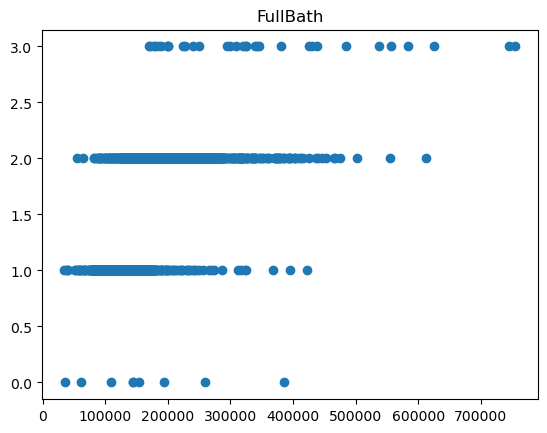

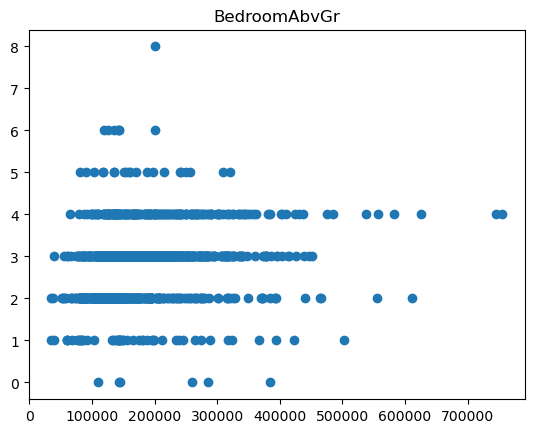

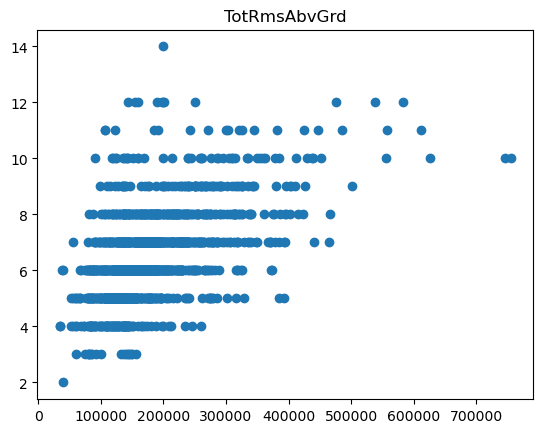

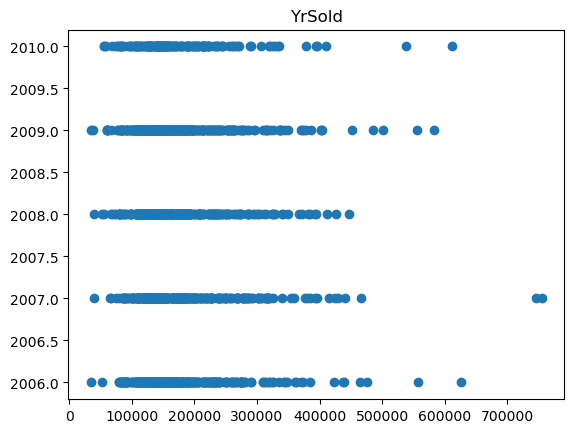

In [6]:
### Now, let's define some important features for predicting the price of the house

features = ['LotFrontage', 'OverallQual','LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'YrSold']

### Plotting the reletionships of selected features between SalePrice.

for i in features:
    plt.scatter(train_df.SalePrice, train_df[i])
    plt.title(i)
    plt.show()


In [7]:
# Select columns corresponding to features, and preview the data
X = train_df[features]
y = train_df.SalePrice
X.head()

,LotFrontage,OverallQual,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd,YrSold
0,65.0,7,8450,2003,856,854,2,3,8,2008
1,80.0,6,9600,1976,1262,0,2,3,6,2007
2,68.0,7,11250,2001,920,866,2,3,6,2008
3,60.0,7,9550,1915,961,756,1,3,7,2006
4,84.0,8,14260,2000,1145,1053,2,4,9,2008


In [8]:
# Select columns corresponding to features, and preview the data (Test dataset)
X_fin = test_df[features]
X_fin.head()

,LotFrontage,OverallQual,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd,YrSold
0,80.0,5,11622,1961,896,0,1,2,5,2010
1,81.0,6,14267,1958,1329,0,1,3,6,2010
2,74.0,5,13830,1997,928,701,2,3,6,2010
3,78.0,6,9978,1998,926,678,2,3,7,2010
4,43.0,8,5005,1992,1280,0,2,2,5,2010


In [9]:
# Split into validation and training data

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1095, 10)
(365, 10)
(1095,)
(365,)


## **Train ML Models**

In [10]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### **XGBOOST Model Using Grid Search Hyperparameter Optimization Technique**

In [11]:
# Create object of class XGBRegressor
xgb = XGBRegressor()

# Bundle preprocessing and modeling code in a pipeline
regressor = Pipeline(steps=[('model', xgb)
                     ])

In [12]:
from sklearn import set_config
set_config(display='diagram')
regressor

Pipeline(steps=[('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

In [13]:
param_grid = [
    {'model__subsample': [0.5], 'model__n_estimators': [1400], 
     'model__max_depth': [5], 'model__learning_rate': [0.02],
     'model__colsample_bytree': [0.4], 'model__colsample_bylevel': [0.5],
     'model__reg_alpha':[2], 'model__reg_lambda': [1]}
]
grid_search = GridSearchCV(regressor, param_grid, cv=3, verbose=1, scoring='neg_mean_absolute_error')

In [14]:
grid_search.fit(X_train, y_train);

Fitting 3 folds for each of 1 candidates, totalling 3 fits


In [15]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__colsample_bylevel,param_model__colsample_bytree,param_model__learning_rate,param_model__max_depth,param_model__n_estimators,param_model__reg_alpha,param_model__reg_lambda,param_model__subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.759133,0.075844,0.007614,0.002804,0.5,0.4,0.02,5,1400,2,1,0.5,"{'model__colsample_bylevel': 0.5, 'model__cols...",-23442.009011,-20891.557909,-18236.124315,-20856.563745,2125.437572,1


In [16]:
# Find Best Parameters
grid_search.best_params_

{'model__colsample_bylevel': 0.5,
 'model__colsample_bytree': 0.4,
 'model__learning_rate': 0.02,
 'model__max_depth': 5,
 'model__n_estimators': 1400,
 'model__reg_alpha': 2,
 'model__reg_lambda': 1,
 'model__subsample': 0.5}

In [17]:
print("Mean Absolute Error on validation data:",-grid_search.best_score_)

Mean Absolute Error on validation data: 20856.563745005707


## **Submit Prediction**

In [18]:
y_preds = grid_search.predict(X_fin)

output = pd.DataFrame({'Id': test_df.Id,
                       'SalePrice': y_preds.round()})
output.to_csv('submission.csv', index=False)